# Portuguese Banking Institution
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was required, in
order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import os
from scipy import stats
from sklearn import metrics

In [ ]:
data = pd.read_csv('bank-full.csv',sep=";", skipinitialspace=True)

### IMPORTING AND VIEWING THE DATASET

In [ ]:
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
print(data.shape[0])  #shows the no of columns
print(data.shape[1])  #shows the no of rows

45211
17


In [ ]:
data.info()    #overall description of the datasheet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### CHECHING AND FIXING MISSING VALUES

In [ ]:
value=data.isnull().values.any()
#print(value)
if value==True:
  print("there are missiong values")
else:
  print("there are no missing values")  

there are no missing values


### DATASET ANALYSIS

In [ ]:
data.mean() #get the mean of all attributes

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [ ]:
data.std()  #gets the standard deviation

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [ ]:
data.median() #gets the median

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

### DATA VISUALIZATION

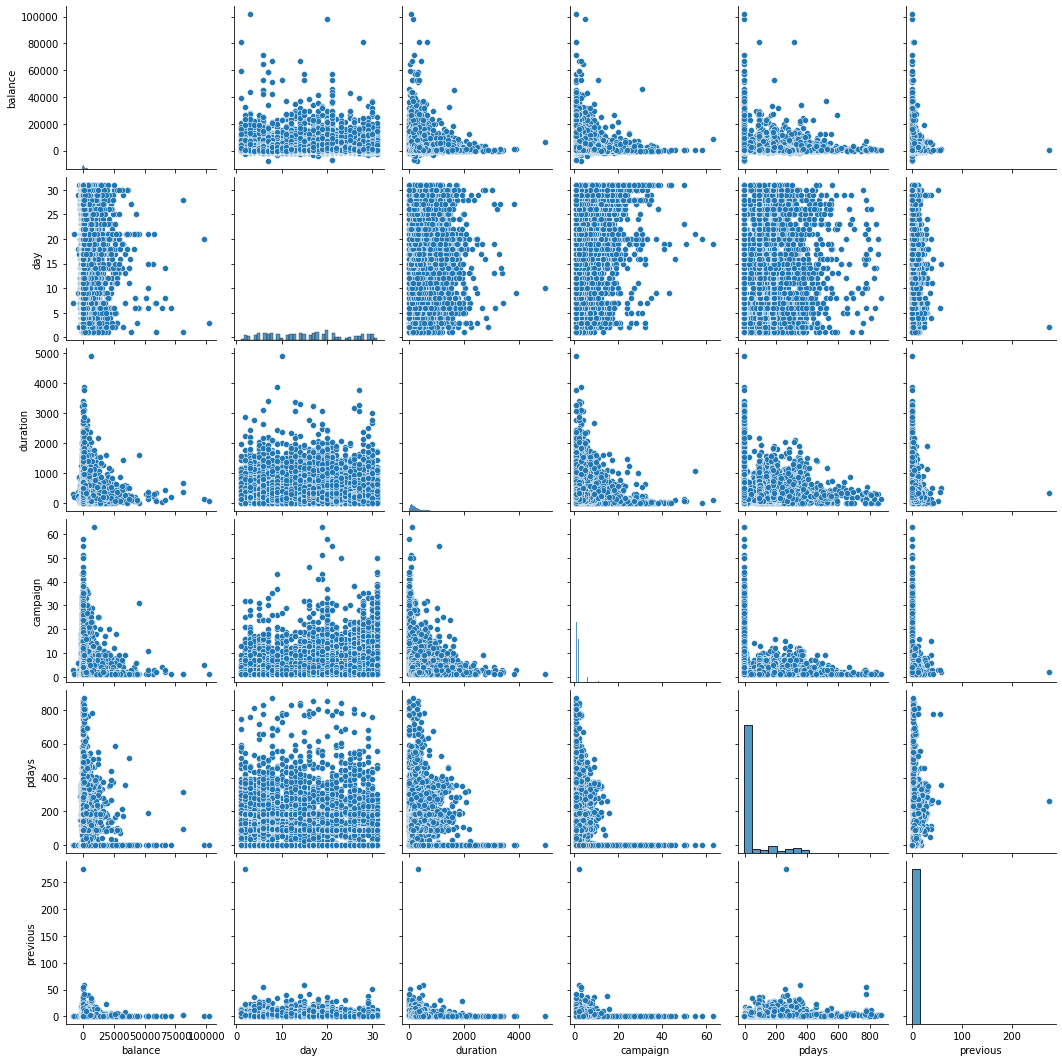

In [ ]:
sns.pairplot(data.iloc[:,1:])

### AGE

In [ ]:
print('Min age: ', data['age'].max())
print('Max age: ', data['age'].min())

Min age:  95
Max age:  18


Text(0.5, 1.0, 'Age Distribution')

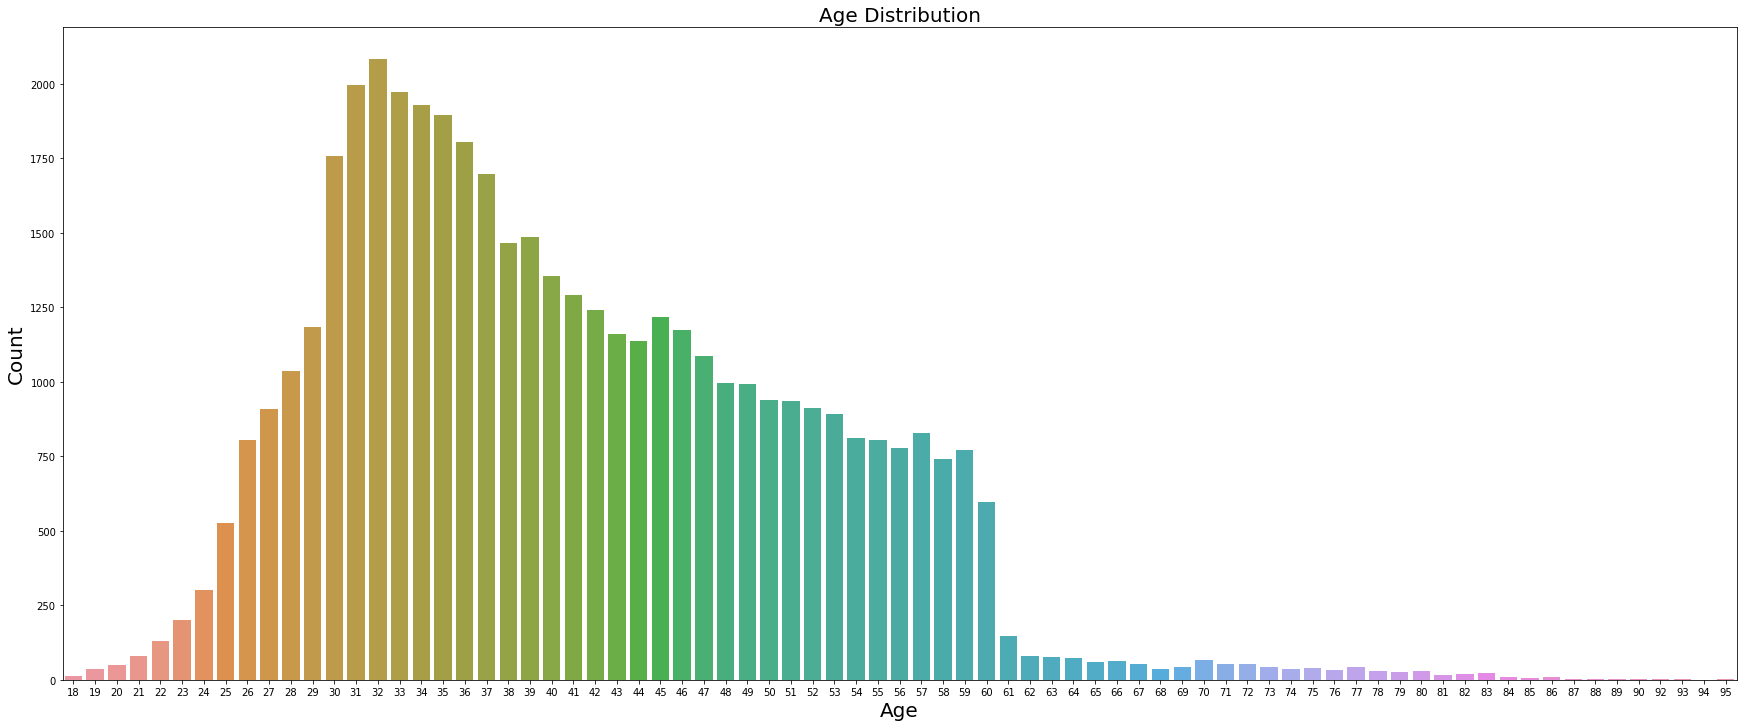

In [ ]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'age', data = data)
plt.xlabel("Age", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Age Distribution', fontsize=20)

### MARITAL

Text(0.5, 1.0, 'Marital Distribution')

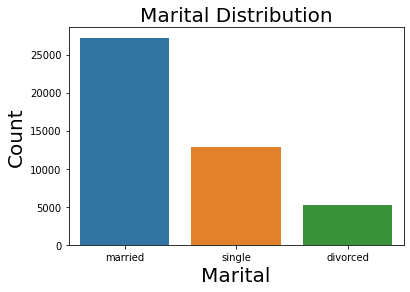

In [ ]:
sns.countplot(x = 'marital',data = data)
plt.xlabel("Marital", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Marital Distribution', fontsize=20)

### JOB

Text(0.5, 1.0, 'Job Distribution')

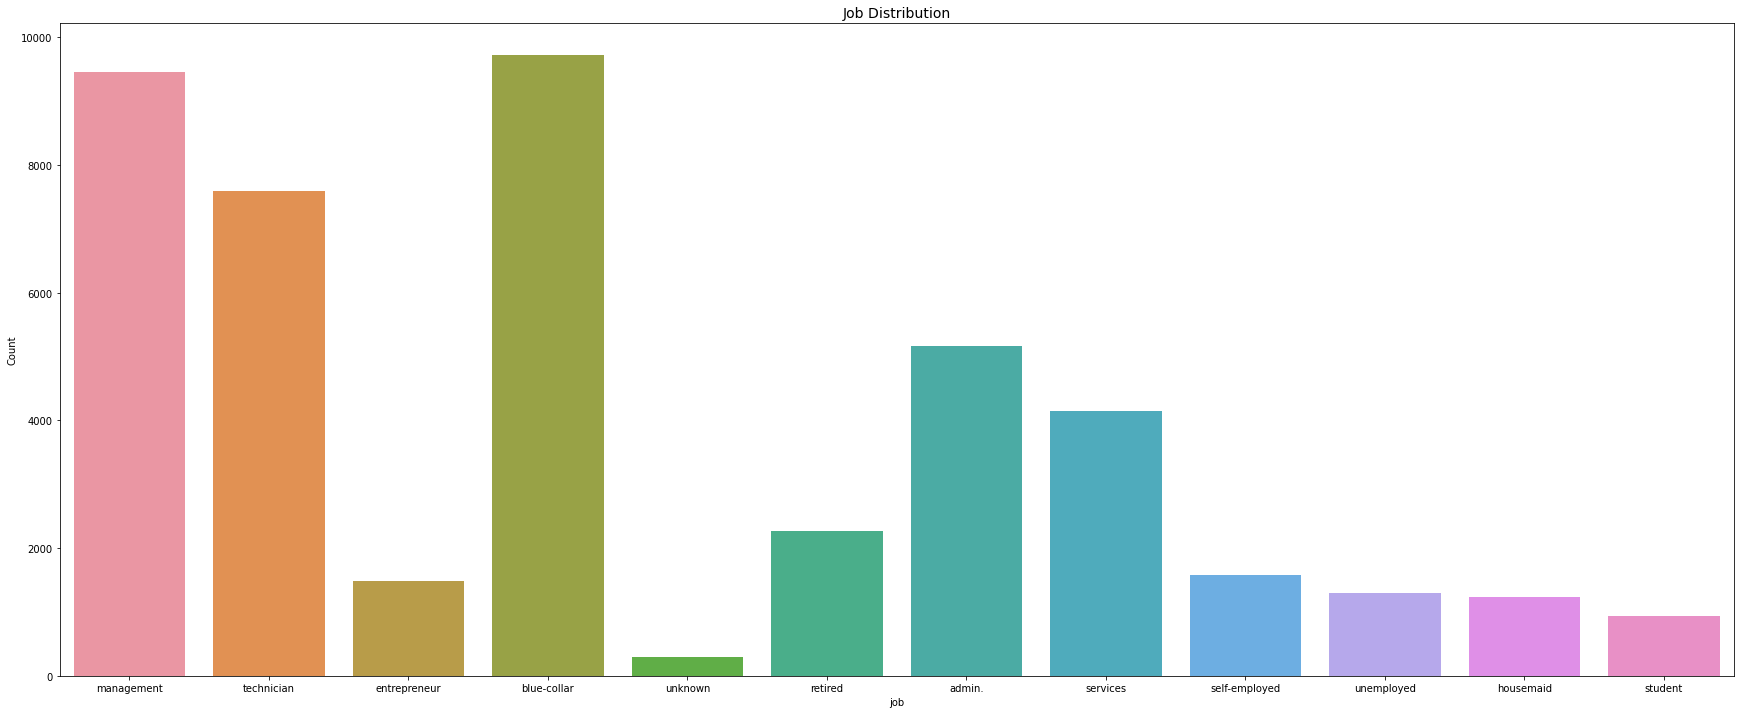

In [ ]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = data)
plt.xlabel("job", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Job Distribution', fontsize=14)

### EDUCATION

Text(0.5, 1.0, 'Education Distribution')

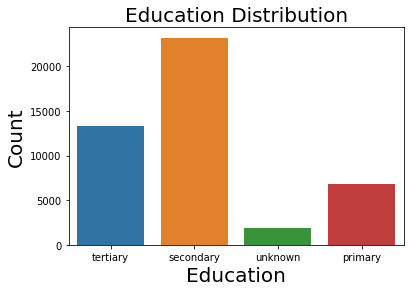

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'education',data = data)
plt.xlabel("Education", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Education Distribution', fontsize=20)

### LOAN

Text(0.5, 1.0, 'Loan Distribution')

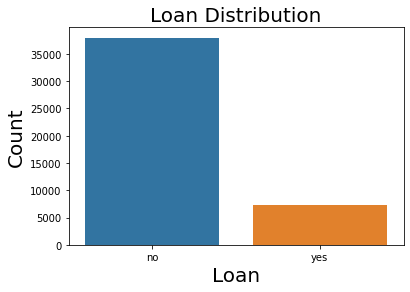

In [ ]:
sns.countplot(x = 'loan',data = data)
plt.xlabel("Loan", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Loan Distribution', fontsize=20)

### HOUSING

Text(0.5, 1.0, 'Housing Distribution')

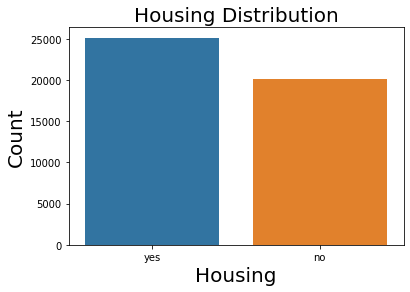

In [ ]:
sns.countplot(x = 'housing',data = data)
plt.xlabel("Housing", fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Housing Distribution', fontsize=20)

### CONTACT

Text(0.5, 1.0, 'Contact Distribution')

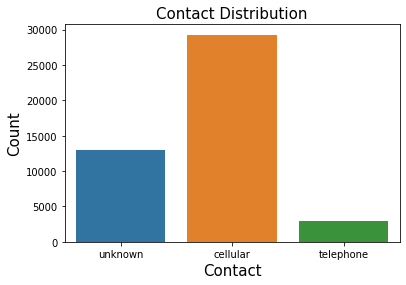

In [ ]:
sns.countplot(x = 'contact',data = data)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

### MONTH

Text(0.5, 1.0, 'Monthly Distribution')

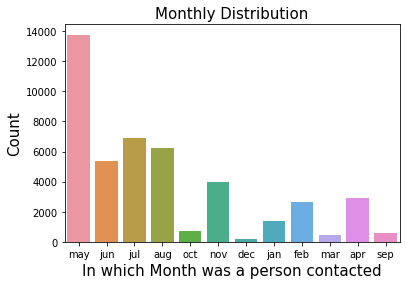

In [ ]:
sns.countplot(x = 'month',data = data)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

### DEFAULT

Text(0.5, 1.0, 'Default Distribution')

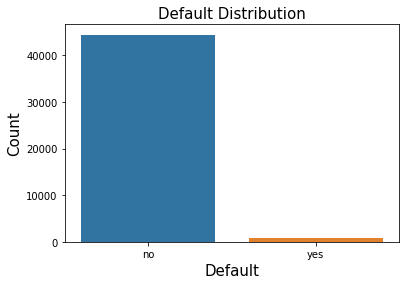

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'default',data = data)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

### CALCULATING CORRELATION MATRIX

In [ ]:
correlation=data.corr()
print(correlation)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


### HEATMAP VISUALIZATION

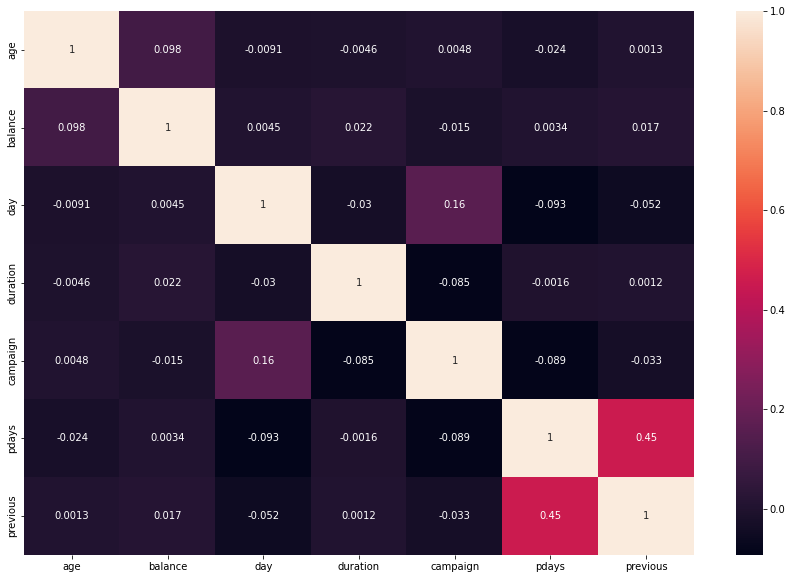

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(correlation,annot=True)

### DATA PRE_PROCESSINGGG

In [ ]:
from sklearn.preprocessing import LabelEncoder
labenco_X = LabelEncoder()
data['job']      = labenco_X.fit_transform(data['job']) 
data['marital']  = labenco_X.fit_transform(data['marital']) 
data['education']= labenco_X.fit_transform(data['education']) 
data['default']  = labenco_X.fit_transform(data['default']) 
data['housing']  = labenco_X.fit_transform(data['housing']) 
data['loan']     = labenco_X.fit_transform(data['loan']) 
data['contact']     = labenco_X.fit_transform(data['contact']) 
data['month']       = labenco_X.fit_transform(data['month'])

In [ ]:
#Grouping the ages as factor
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data);

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,1,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,1,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,1,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [ ]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,3,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,unknown,yes
45207,4,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,unknown,yes
45208,4,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,success,yes
45209,3,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,unknown,no
45210,2,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,other,no


In [ ]:
#fn to group duration
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(data);

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,4,1,2,NaN,2143,NaN,NaN,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,NaN,29,NaN,NaN,2,5,8,2,1,-1,0,1,no
2,2,2,1,1,NaN,2,NaN,NaN,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,NaN,1506,NaN,NaN,2,5,8,1,1,-1,0,1,no
4,2,11,2,3,NaN,1,NaN,NaN,2,5,8,3,1,-1,0,1,no


In [ ]:
data.loc[(data['pdays'] == 999), 'pdays'] = 1
data.loc[(data['pdays'] > 0) & (data['pdays'] <= 10), 'pdays'] = 2
data.loc[(data['pdays'] > 10) & (data['pdays'] <= 20), 'pdays'] = 3
data.loc[(data['pdays'] > 20) & (data['pdays'] != 999), 'pdays'] = 4 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,1,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,1,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,1,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [ ]:
data['poutcome'].replace(['unknown', 'failure','other', 'success'], [1,2,3,4], inplace  = True)

In [ ]:
final_data=data
print(final_data.shape)
final_data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,1,no
1,1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,1,no
2,1,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,1,no
3,1,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,1,no
4,1,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,1,no


In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### SPLITTING DS INTO TEST AND TRAIN

In [ ]:
X = final_data.values[:,0:15]  #excludin te outcome variable
Y = final_data.values[:,16]        #makin test wrt outcome varr

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.70, random_state = 7) ###split ratio=.70

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = clf.predict(X_test)  ##predicting on test set

### NAIVE BAYES CLASSIFIER

In [ ]:
NB=accuracy_score(Y_test, Y_pred, normalize = True) #getting accuracy with NB classifier
print('Accuracy_score:',NB)

Accuracy_score: 0.8544615773508595


In [ ]:
print('ConMAT NB:')
print(metrics.confusion_matrix(Y_test,Y_pred))

ConMAT NB:
[[25197  2733]
 [ 1873  1845]]


### REGRESSION MODEL

In [ ]:
arr = data.values
X = arr[:,0:16] # rows without the outcome var
Y = arr[:,16]   # rows with outcome var
test_size = 0.70 # SPLIT ratio 
seed = 123  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

numpy.ndarray

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_predict = model2.predict(X_test)
LR = model2.score(X_test, y_test)
print('Accuracy:',LR)
print('confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_predict))

Accuracy: 0.8855535894843276
confusion_matrix:
[[27321   578]
 [ 3044   705]]


### SUPPORT VECTOR MACHINES

In [ ]:
accuracies = {}
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

accSVM = svm.score(X_train,Y_train)*100
accuracies['SVM'] = accSVM
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 100.00%


### RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, Y_train)

accRF = rf.score(X_train, Y_train)*100
accuracies['Random Forest'] = accRF
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%


## MODEL COMPARISON

In [ ]:
models = pd.DataFrame({
                'Models': [ 'Gausian NB','Logistic Model','SVM','Random FOrest'],
                'Score':  [NB,  LR, accSVM, accRF]})

models.sort_values(by='Score', ascending=True)

,Models,Score
0,Gausian NB,0.854462
1,Logistic Model,0.885554
2,SVM,88.417017
3,Random FOrest,100.000000
